# Regresión Lineal Simple (una única variable de entrada o variable independiente)

## Ejercicio 3

A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

<div align="center">
	<table style="border-collapse: collapse; text-align: center;">
	<tr style="background-color:#4DA6D8; color:white;">
		<th style="padding:8px; border:1px solid #ddd;">Horas de Entrenamiento</th>
		<th style="padding:8px; border:1px solid #ddd;">Tiempo Promedio (min)</th>
	</tr>
	<tr><td>2</td><td>30.5</td></tr>
	<tr><td>3</td><td>29.3</td></tr>
	<tr><td>4</td><td>26.7</td></tr>
	<tr><td>4</td><td>26.0</td></tr>
	<tr><td>5</td><td>25.5</td></tr>
	<tr><td>6</td><td>24.7</td></tr>
	<tr><td>6</td><td>23.5</td></tr>
	<tr><td>7</td><td>23.0</td></tr>
	<tr><td>7</td><td>22.5</td></tr>
	<tr><td>8</td><td>21.0</td></tr>
	<tr><td>10</td><td>21.0</td></tr>
	<tr><td>10</td><td>20.5</td></tr>
	</table>
</div>

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales. Responder:


### a)  

Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?


In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame({
    'horas_entrenamiento': [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    'tiempo_promedio': [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]
})

print("Correlación entre horas de entrenamiento y tiempo promedio:", data.corr().iloc[0,1]) #-0.96: la recta de regresión será de utilidad pues existe una alta correlación lineal

Correlación entre horas de entrenamiento y tiempo promedio: -0.9597463860068594


### b)  

Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.

El error cuadrático, valor a minimizar, que se utiliza en esta técnica es:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.

### c)  

Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico.  
¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?

El valor a minimizar en esta técnica es:

$$
\xi = \left\langle \epsilon_{k}^{2} \right\rangle \approx (y_i - \hat{y}_i)^2
$$

Esta ecuación si bien es una aproximación y no tiene la misma exactitud que la anterior, tiene la ventaja de no requerir todos los puntos para el cálculo, sino que permite realizar el cálculo por separado y permite no recalcular todo cuando se añade un nuevo punto.


### d)  

Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales.


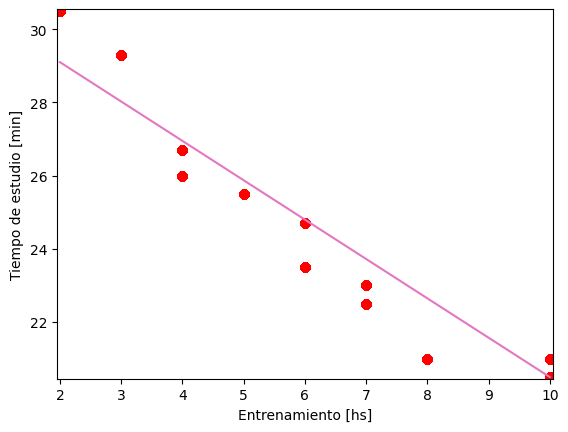

w: [-1.07573822], b: 31.252150842609524


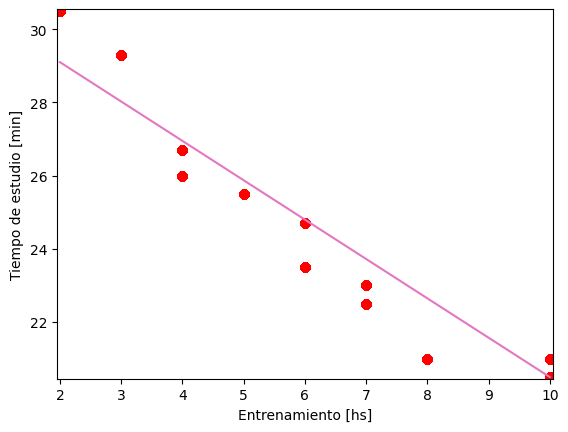

In [ ]:
from Fuentes.ClassNeuronaLineal import *

ALPHA = 0.01
MAX_ITE = 1000
COTA = 10e-6

nl_lin = NeuronaLineal(alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA, draw=1, title=["Entrenamiento [hs]", "Tiempo de estudio [min]"])
X = data['horas_entrenamiento'].values.reshape(-1, 1)
y = data['tiempo_promedio'].values
nl_lin.fit(X, y)
print(f"w: {nl_lin.w_[0]}, b: {nl_lin.b_}")

### e)  

Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia fija un corredor que entrena 9 horas semanales.



In [13]:
m = nl_lin.w_[0]
b = nl_lin.b_
hs_to_predict = 9
print("Un corredor que entrena 9 horas semanales tardaría en promedio:", nl_lin.predict([hs_to_predict]), "minutos")

Un corredor que entrena 9 horas semanales tardaría en promedio: 21.57050684910217 minutos
